# Importing SymPy

Symbolic computing is an entirely different paradigm in computing compared to the
numerical array-based computing introduced in the previous chapter. In symbolic
computing software, also known as computer algebra systems (CASs), representations
of mathematical objects and expressions are manipulated and transformed analytically.
Symbolic computing is mainly about using computers to automate analytical
computations that can in principle be done by hand with pen and paper. However, by
automating the book-keeping and the manipulations of mathematical expressions using
a computer algebra system, it is possible to take analytical computing much further than
can realistically be done by hand. Symbolic computing is a great tool for checking and
debugging analytical calculations that are done by hand, but more importantly it enables
carrying out analytical analysis that may not otherwise be possible

SymPy is entirely written in Python and provides tools for a
wide range of analytical and symbolic problems. In this chapter we look in detail into
how SymPy can be used for symbolic computing with Python

In [1]:
import sympy
sympy.init_printing()

In [2]:
from sympy import I, pi, oo

In [3]:
x = sympy.Symbol("x")
x

The variable x now represents an abstract mathematical symbol x of which very little
information is known by default

In [4]:
y = sympy.Symbol("y", real=True)
y.is_real

True

In [5]:
x.is_real is None

True

In [6]:
sympy.Symbol("z", imaginary=True).is_real

False

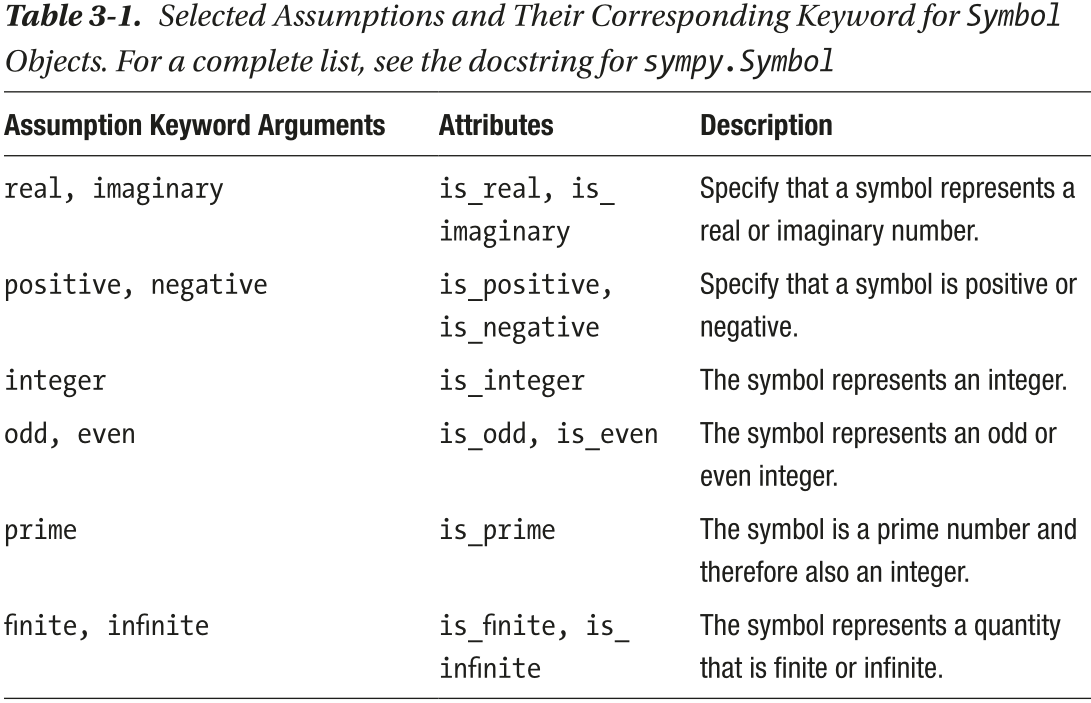

When applicable, adding these
assumptions to symbols can frequently help SymPy to simplify various expressions
further than otherwise possible. Consider the following simple example:

In [7]:
x = sympy.Symbol('x')
y = sympy.Symbol('y', positive=True)

sympy.sqrt(x**2)

### Different result based on initial params

In [8]:
sympy.sqrt(y**2)

In [9]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

In [10]:
sympy.cos(n1 * pi)

In [11]:
sympy.cos(n2 * pi)

In [12]:
sympy.cos(n3 * pi)

In [13]:
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)

For this
reason, we cannot directly use the built-in Python objects for integers, int, and floating-­
point numbers, float, and so on. Instead, SymPy provides the classes sympy.Integer
and sympy.Float for representing integers and floating-point numbers within the SymPy
framework. This distinction is important to be aware of when working with SymPy, but
fortunately we rarely need to concern ourselves with creating objects of type sympy.
Integer and sympy.Float to representing specific numbers, since SymPy automatically
promotes Python numbers to instances of these classes when they occur in SymPy
expressions. However, to demonstrate this difference between Python’s built-in number
types and the corresponding types in SymPy, in the following example, we explicitly
create instances of sympy.Integer and sympy.Float and use some of their attributes to
query their properties

In [14]:
i = sympy.Integer(19)
type(i)

sympy.core.numbers.Integer

In [15]:
i.is_integer, i.is_real, i.is_odd

(True, True, True)

In [16]:
f = sympy.Float(2.3)
type(f)

sympy.core.numbers.Float

In [17]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

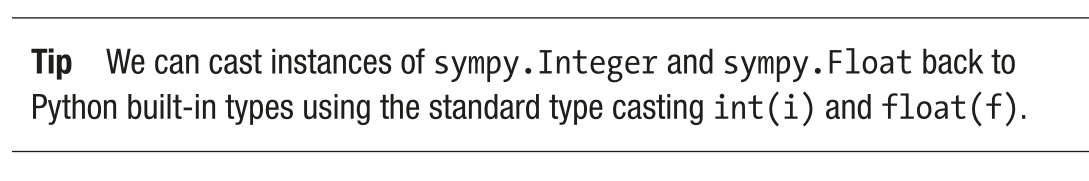

In [18]:
i, f = sympy.sympify(19), sympy.sympify(2.3)
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

## Integer

In [19]:
n = sympy.Symbol("n", integer=True)
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [20]:
i = sympy.Integer(19)
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

In [21]:
i ** 50

In [22]:
sympy.factorial(100)

### Holy shit!

In [23]:
sympy.factorial(1000)

## Float

In [24]:
sympy.Float(0.3, 25)

In [25]:
sympy.Float('0.3', 25)

## Rational

In [27]:
sympy.Rational(11, 13)

In [30]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1 * r2

In [31]:
r1/r2

## Constants and Special Symbols

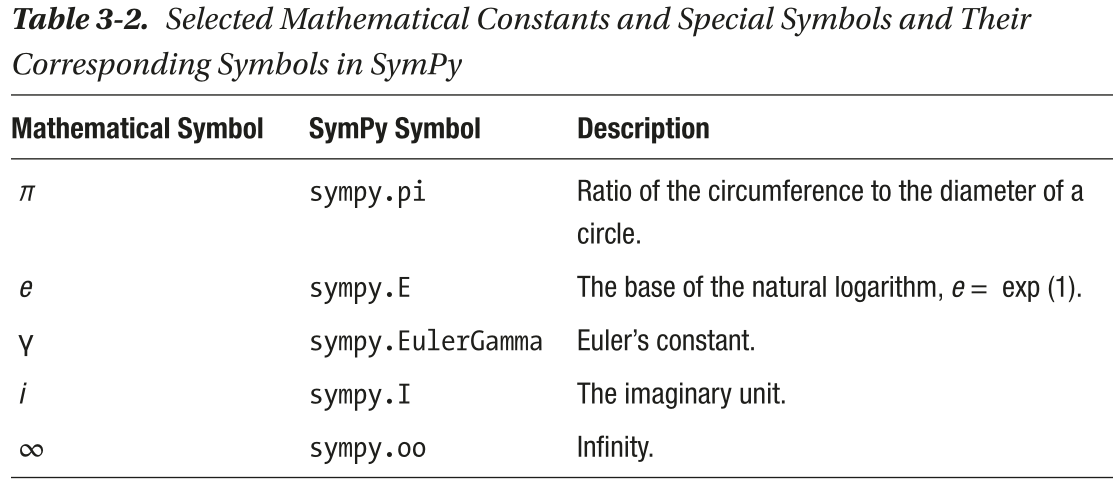

In [34]:
sympy.pi

In [68]:
# Import in top cell
pi

In [69]:
sympy.cos(pi)

In [70]:
sympy.sin(pi)

In [71]:
sympy.cos(pi)**2+sympy.sin(pi)**2

### Euler identity in polar

$e^{i \omega t}$

In case of

$e^{i(2 \pi)}=1$

In [76]:
two_pi = 2 * pi

In [77]:
sympy.E**(I * two_pi)

### Euler identity in trig

In [78]:
sympy.cos(two_pi) + I * sympy.sin(two_pi)

## Functions

In [46]:
x, y, z = sympy.symbols("x, y, z")
f = sympy.Function("f")
type(f)

sympy.core.function.UndefinedFunction

In [47]:
f(x)

### You can put any number of params

In [48]:
f(x, y, z)

### Init with params

In [50]:
g = sympy.Function("g")(x, y, z)
g

Here we have also used the property free_symbols, which returns a set of unique
symbols contained in a given expression (in this case the applied undefined function g),
to demonstrate that an applied function indeed is associated with a specific set of input
symbols

In [51]:
g.free_symbols

In [59]:
sympy.sin

sin

In [60]:
sympy.sin(x)

In [61]:
sympy.sin(pi * 1.5)

When applied to an abstract symbol, such as x, the sin function remains
unevaluated, but when possible it is evaluated to a numerical value, for example,
when applied to a number or, in some cases, when applied to expressions with certain
properties, as in the following example

In [63]:
n = sympy.Symbol("n", integer=True)
sympy.sin(pi * n)

A third type of function in SymPy is lambda functions, or anonymous functions,
which do not have names associated with them, but do have a specific function body
that can be evaluated. Lambda functions can be created with sympy.Lambda:

In [64]:
h = sympy.Lambda(x, x**2)
h

In [65]:
h(5)

In [66]:
h(1 + x)